# Luxor Introduction

https://juliagraphics.github.io/Luxor.jl/v3.7/

`Luxor` is a Julia package for drawing simple static vector graphics. It provides basic drawing functions and utilities for working with shapes, polygons, clipping masks, PNG and SVG images, turtle graphics, and simple animations.

`Luxor` is thoroughly procedural and static: your code issues a sequence of simple graphics 'commands' until you've completed a drawing, then the results can be displayed for preview and saved into a PDF, PNG, SVG, or EPS file.

`Luxor` isn't interactive: for interactive graphics, look at `Pluto.jl`, `Makie`, and `Javis`.

# Samples of Luxor Drawings

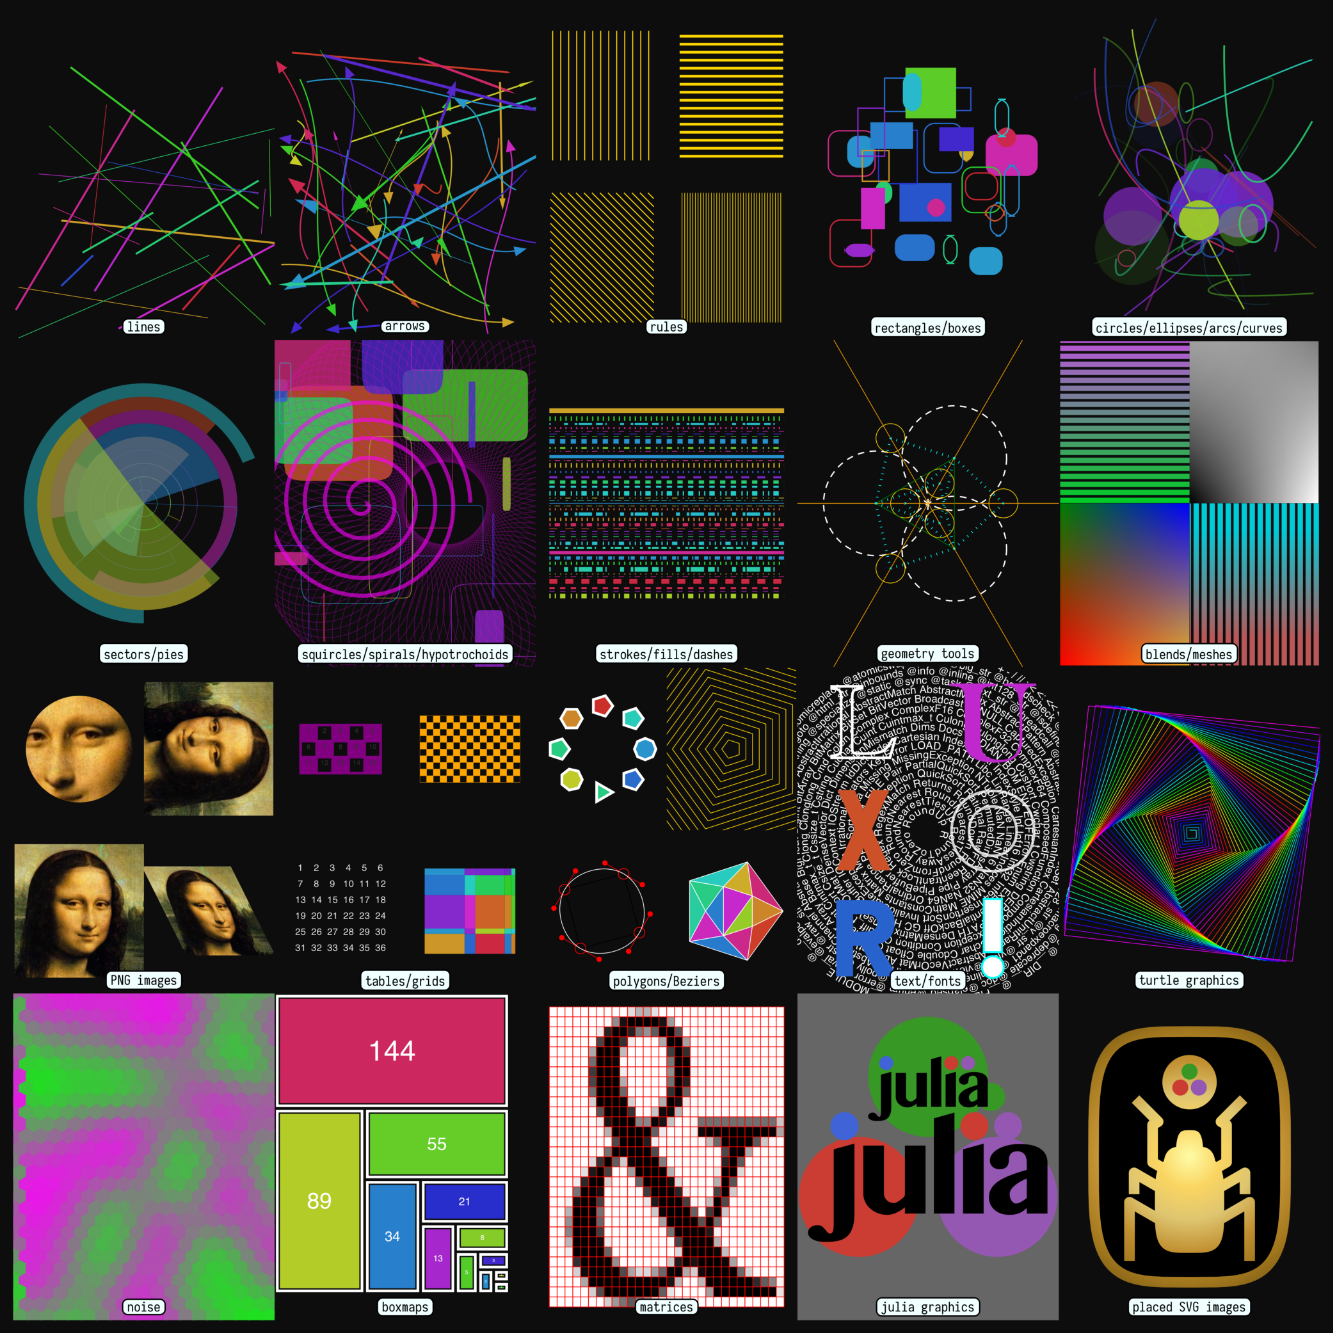

# Luxor Function Reference

https://juliagraphics.github.io/Luxor.jl/dev/reference/functionindex/




# Drawings in memory

You can choose to store the drawing in memory. The advantage is that in-memory drawings are quicker, and can be passed as Julia data. It's useful in some environments to not have to worry about writing files. This syntax for the Drawing function:

`Drawing(width, height, surfacetype, [filename])`

lets you supply surfacetype as a symbol (`:svg` or `:png`. This creates a new drawing of the given surface type and stores the image only in memory if no filename is supplied.
 
You can specify `:image` as the surface type. This allows you to copy the current drawing into a 2D matrix (using `image_as_matrix`). See the `Images` chapter for more information.

Use `svgstring` to obtain the SVG source for a finished SVG drawing.

### A simple "hello world" Drawing 

In [2]:
using Luxor

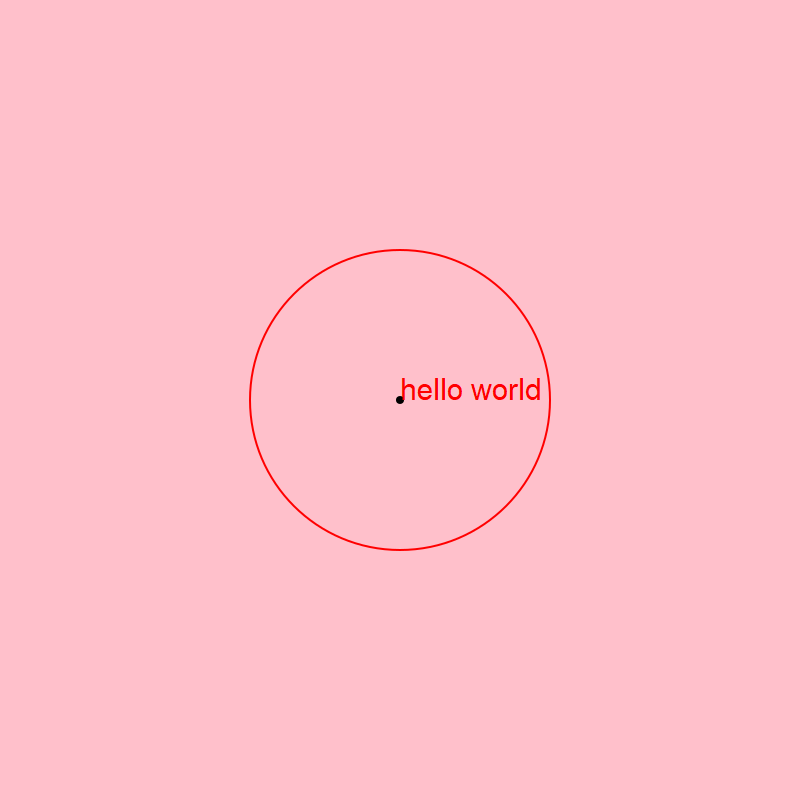

In [27]:
Drawing()   # (600, 600) is the default drawing size
    origin()            # set the origin to the center of the drawing surface
    background("pink")
    
    sethue("black")
    circle(O, 4, :fill)

    sethue("red")
    fontsize(30)
    text("hello world")
    circle(Point(0, 0), 150, action = :stroke)
finish()
preview()

In [30]:
d = Drawing(400, 300)   # (600, 600) is the default drawing size
origin()            # set the origin to the center of the drawing surface
background("pink")

sethue("black")
circle(O, 4, :fill)

sethue("red")
fontsize(30)
text("hello world")
circle(Point(0, 0), 150, action = :stroke)
finish()

true

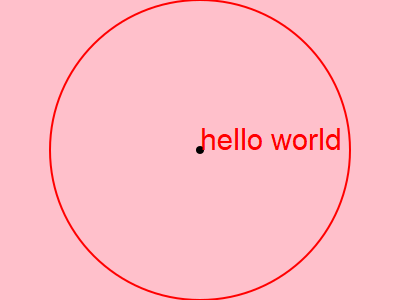

In [31]:
d

Drawing with :image

In [4]:
buffer = zeros(UInt32, 300, 300)
di = Drawing(300, 300, :image)     # (600, 600) is the default drawing size
    origin()            # set the origin to the center of the drawing surface
    background("pink")
    
    sethue("black")
    circle(O, 4, :fill)

    sethue("red")
    fontsize(30)
    text("hello world")
    circle(Point(0, 0), 150, action = :stroke)
    m = image_as_matrix!(buffer)
finish()
#preview()

true

In [5]:
di

 Luxor drawing: (type = :image, width = 300.0, height = 300.0, location = in memory)


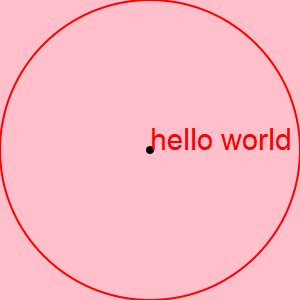

In [6]:
using Images
# collect(m)) is Array{ARGB32,2}
di_img = Images.RGB.(m)

In [7]:
typeof(di_img), size(di_img)

(Matrix{RGB{N0f8}}, (300, 300))

In [14]:
buffer = zeros(UInt32, 20, 20)
di = Drawing(20, 20, :image)     # (600, 600) is the default drawing size
    origin()            # set the origin to the center of the drawing surface
    background("pink")
    
    point1 = Point(-10, -10)
    point2 = Point(10, 6)
    
    sethue("black")
    rule(point1, slope(point1, point2))

    sethue("red")
    circle(point1, 2, :fill)
    sethue("green")
    circle(point2, 2, :fill)
    
    m = image_as_matrix!(buffer)
finish()

true

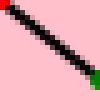

In [15]:
using Images
# collect(m)) is Array{ARGB32,2}
di_img = Images.RGB.(m)

In [16]:
buffer = zeros(UInt32, 20, 20)
di = Drawing(20, 20, :image)     # (600, 600) is the default drawing size
    origin()            # set the origin to the center of the drawing surface
    rotate(π)           # Change y-axis to point up
    background("pink")
    
    point1 = Point(-10, -10)
    point2 = Point(10, 6)
    
    sethue("black")
    rule(point1, slope(point1, point2))

    sethue("red")
    circle(point1, 2, :fill)
    sethue("green")
    circle(point2, 2, :fill)
    
    m = image_as_matrix!(buffer)
finish()

true

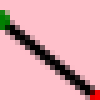

In [17]:
using Images
# collect(m)) is Array{ARGB32,2}
di_img = Images.RGB.(m)

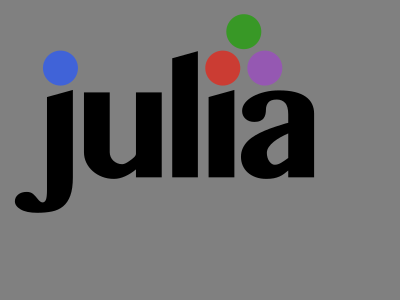

In [24]:
Drawing(400, 300)
    background("gray")
    julialogo()
finish()
preview()

# Quick drawings with macros

The `@draw`, `@svg`, `@png`, and `@pdf` macros are designed to let you quickly create graphics without having to provide the usual boiler-plate functions. For example, the Julia code:

`@svg circle(Point(0, 0), 20, :stroke) 50 50`
expands to

`Drawing(50, 50, "luxor-drawing-(timestamp).svg")

origin()

background("white")

sethue("black")

circle(Point(0, 0), 20, :stroke)

finish()

preview()`

They're just short-cuts - designed to save a bit of typing. You can omit the width and height (thus defaulting to 600 by 600, except for @imagematrix), and you don't have to specify a filename (you'll get time-stamped files in the current working directory). For multiple lines, use either:

`@`svg begin
    setline(10)
    sethue("purple")
    circle(Point(0, 0), 20, :fill)
end`

or (less nicely):

`@svg (setline(10);

      sethue("purple");

      circle(Point(0, 0), 20, :fill)
      
     )`
     
The `@draw` macro creates a PNG drawing in-memory (not saved in a file). You should see it displayed if you're working in a suitable environment (Juno, VSCode, Jupyter, Pluto).

The SVG equivalent of @draw is @drawsvg.

If you don't specify a size, the defaults are usually 600 by 600. If you don't specify a file name, files created with the macros are placed in your current working directory as luxor-drawing- followed by a time stamp. You don't even have to specify the suffix:

@svg juliacircles(150) 400 400 "test" # saves in "test.svg"
If you want to create drawings with transparent backgrounds, or use variables to specify filenames, you have to use the longer form, rather than the macros:

`Drawing()
background(1, 1, 1, 0)
origin()
setline(30)
sethue("green") # assumes current opacity
box(BoundingBox() - 50, :stroke)
finish()
preview()`

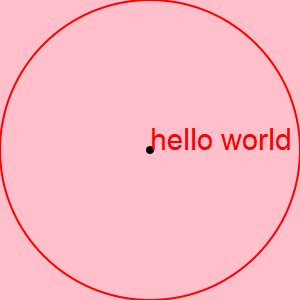

In [10]:
@draw begin           
    background("pink")
    
    sethue("black")
    circle(O, 4, :fill)

    sethue("red")
    fontsize(30)
    text("hello world")
    circle(Point(0, 0), 150, action = :stroke)

end 300 300              # drwaing surface default to (600, 600)

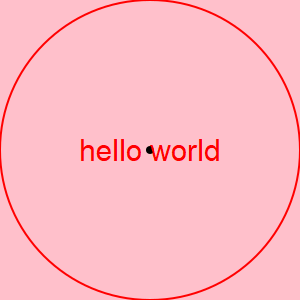

In [12]:
@png begin 
    background("pink")

    sethue("black")
    circle(O, 4, :fill)
    
    sethue("red")
    fontsize(30)
    circle(Point(0, 0), 150, action =:stroke)
    text("hello world", halign=:center, valign=:middle)
end 300 300

# Luxor v.3.7.0 Tutorial Examples

https://juliagraphics.github.io/Luxor.jl/v3.7/tutorial/helloworld/


## The drawing surface

The origin (0/0) starts off at the top left: the x axis runs left to right across the page, and the y axis runs top to bottom down the page.

The `origin()` function moves the 0/0 point to the center of the drawing. It's often convenient to do this at the beginning of a program.

You can use functions like `scale()`, `rotate()`, and `translate()` to change the coordinate system.

## Simple graphics (simple shapes)

https://docs.juliahub.com/Luxor/HA9ps/2.10.0/simplegraphics/ 

In Luxor, there are different ways of working with graphical items. You can either draw them immediately (ie place them on the drawing, and they're then fixed). Or you can construct geometric objects as lists of points for further processing. Watch out for a vertices=true option, which returns coordinate data rather than drawing a shape.

## Line Drawing

Use `line()` and `rline()` to draw straight lines. 

`line(pt1, pt2, action)`
 draws a line between two points. 

`line(pt)` 
adds a line to the current path going from the current position to the point. 

`rline(pt)` 
adds a line relative to the current position.

`rule(pos, theta;`

    `boundingbox=BoundingBox(),`

    `vertices=false)`

Draw a straight line through pos at an angle theta from the x axis.

By default, the line spans the entire drawing, but you can supply a BoundingBox to change the extent of the line.



## Rectangles and boxes

`rect()` rectangles are positioned by a corner, but a box made with `box()` can either be defined by its center and dimensions, or by two opposite corners.

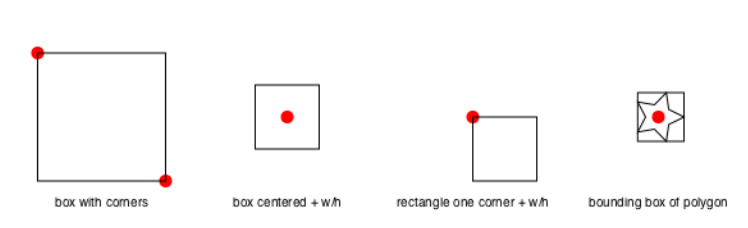

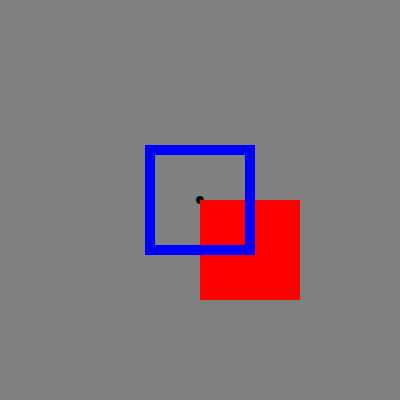

In [14]:
Drawing(400, 400)
    background("gray")
    origin() # Move the origin to the center

    sethue("black")
    circle(O, 4, :fill)

    sethue("red")
    rect(O, 100, 100, action=:fill)

    setline(10)  # set line size
    sethue("blue")
    box(O, 100, 100, action=:stroke)
finish()
preview()

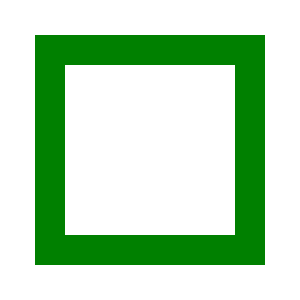

In [48]:
Drawing(300, 300)
    background(1, 1, 1, 0)
    origin()
    setline(30)
    sethue("green") 
    box(BoundingBox() - 50, :stroke)
finish()
preview()

## Circles and ellipses

There are various ways to make circles, including by center and radius, or passing through two or three points:

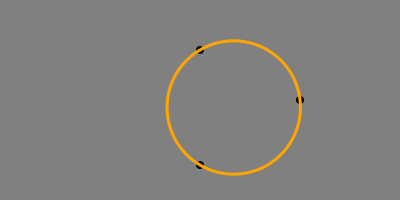

In [15]:
Drawing(400, 200, "circles.png") 
    background("gray")
    origin() 
    
    sethue("black")
    p1 = Point(0, -50)
    p2 = Point(100, 0)
    p3 = Point(0, 65)
    map(p -> circle(p, 4, :fill), [p1, p2, p3])

    setline(3)
    sethue("orange")
    circle(center3pts(p1, p2, p3)..., :stroke)

finish()
preview()

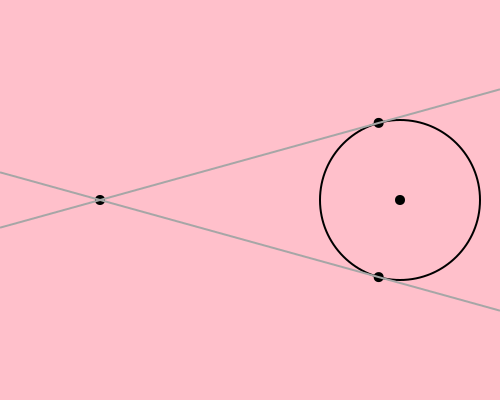

In [16]:
Drawing(500, 400)
    origin()
    background("pink")

    point = Point(-150, 0)
    circlecenter = Point(150, 0)
    circleradius = 80

    circle.((point, circlecenter), 5, :fill)
    circle(circlecenter, circleradius, :stroke)
    pt1, pt2 = pointcircletangent(point, circlecenter, circleradius)
    circle.((pt1, pt2), 5, :fill)

    sethue("grey65")
    rule(point, slope(point, pt1))
    rule(point, slope(point, pt2))

finish()
preview()

The `center3pts()` function returns the center position and radius of a circle passing through three points:

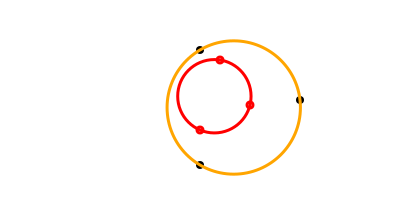

In [17]:
Drawing(400, 200) 
background("white")
origin()

setline(3) 
sethue("black")
p1 = Point(0, -50)
p2 = Point(100, 0)
p3 = Point(0, 65)
map(p -> circle(p, 4, :fill), [p1, p2, p3])

sethue("orange")
circle(center3pts(p1, p2, p3)..., :stroke)

sethue("red")
p1 = Point(0, 30)
p2 = Point(20, -40)
p3 = Point(50, 5)
circle.((p1, p2, p3), 3, :stroke)
circle(p1, p2, p3, :stroke)

finish()
preview()

## Draw ellipses

With `ellipse()` you can place ellipses and circles by defining the center point and the width and height.

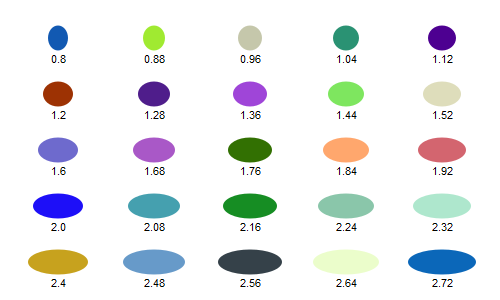

In [18]:
using  Random 
Drawing(500, 300)
background("white") 
origin() # hide

fontsize(11) 
Random.seed!(1)

tiles = Tiler(500, 300, 5, 5)
width = 20
height = 25
for (pos, n) in tiles
    global width, height
    randomhue()
    ellipse(pos, width, height, :fill)
    sethue("black")
    label = string(round(width/height, digits=2))
    textcentered(label, pos.x, pos.y + 25)
    width += 2
end
finish() 
preview()

`ellipse()` can also construct polygons that are approximations to ellipses. You supply two focal points and a length which is the sum of the distances of a point on the perimeter to the two focii.

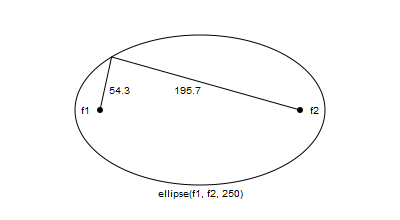

In [19]:
using Random 
Drawing(400, 220) 
origin() 
background("white")
Random.seed!(42)

sethue("black")
setline(1)
fontface("Menlo")

f1 = Point(-100, 0)
f2 = Point(100, 0)

circle.([f1, f2], 3, :fill)

epoly = ellipse(f1, f2, 250, vertices=true)
poly(epoly, :stroke,  close=true)

pt = epoly[rand(1:end)]

poly([f1, pt, f2], :stroke)

label("f1", :W, f1, offset=10)
label("f2", :E, f2, offset=10)

label(string(round(distance(f1, pt), digits=1)), :SE, midpoint(f1, pt))
label(string(round(distance(pt, f2), digits=1)), :SW, midpoint(pt, f2))

label("ellipse(f1, f2, 250)", :S, Point(0, 75))

finish()
preview()

The advantage of this method is that there's a vertices=true option, allowing further scope for polygon manipulation.

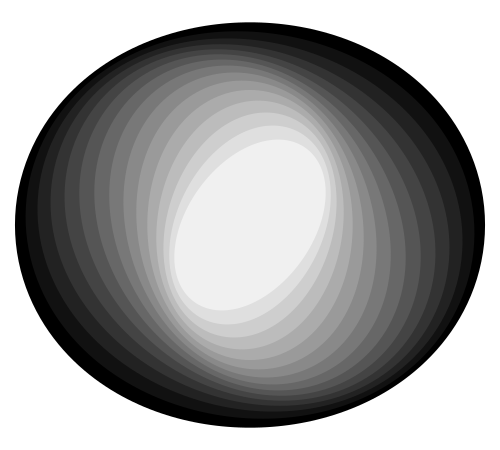

In [20]:
Drawing(500, 450)
origin()
background("white")

sethue("gray30")
setline(1)
f1 = Point(-100, 0)
f2 = Point(100, 0)
ellipsepoly = ellipse(f1, f2, 170, :none, vertices=true)
[ begin
    setgray(rescale(c, 150, 1, 0, 1))
    poly(offsetpoly(ellipsepoly, c), close=true, :fill);
    rotate(π/20)
  end
     for c in 150:-10:1 ]
finish()
preview()

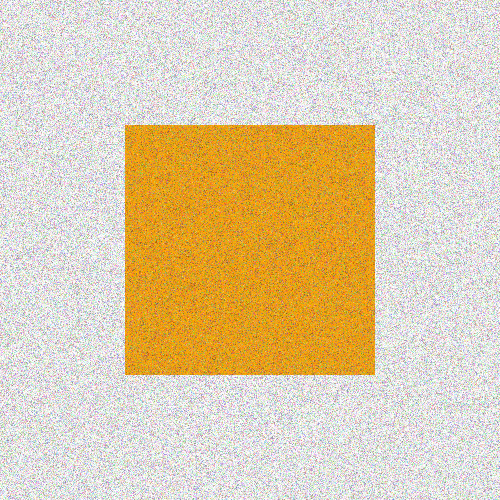

In [3]:
using Colors
N = 500
i = reshape([RGBA(rand(4)...) for p in 1:N^2], N, N)
# is is Matrix{RGBA{Float64}}
# (alias for Array{RGBA{Float64}, 2})
@draw begin
  origin()
  sethue("orange")
  box(O, N/2, N/2, :fill)
  placeimage(i, O, centered=true, alpha=0.5)
end 500 500